This notebook preprocesses the inventory for all combinations of province and management unit.

In [1]:
province_codes = ['BC', 'AB', 'SK', 'MB']
mu_codes = {'BC':[1, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 25, 26, 27, 28, 29 ,30, 31, 32, 34, 35, 36, 37, 38, 39, 40, 41],
            'AB':[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20],
            'SK':[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19],
            'MB':[1, 2, 3, 4, 5]}

In [2]:
#mu_codes = {'BC':[1]} # just for dev and debug

In [19]:
verbose = True
pixel_width = 90
province_code, mu_code = 'BC', 1

import geopandas as gpd
if verbose: print('processing', province_code, mu_code)
src_shp_path = 'data/fullwbmodel_invyld/%s_fma_clean/%s%i_inv90m.shp' % (province_code.lower(),
                                                                         province_code.lower(),
                                                                         mu_code)
snk_shp_path = 'data/shp/%s%02d.shp' % (province_code.lower(), mu_code)
if verbose: print('reading shapefile')
gdf = gpd.read_file(src_shp_path)


processing BC 1
reading shapefile


In [20]:
if verbose: print('buffering points to vector polygon pixels')
gdf.geometry = gdf.geometry.buffer(pixel_width/2, cap_style=3)
if verbose: print('computing area_ha_px')
gdf['area_ha_px'] = gdf.geometry.area * 0.0001
if verbose: print('sorting')
gdf = gdf.sort_values('area_ha', ascending=False)
if verbose: print('computing area_ha_cs')
gdf['area_ha_cs'] = gdf.area_ha_px.cumsum()
if verbose: print(gdf.area_ha.sum())
gdf = gdf.query('area_ha_cs < %i' % int(gdf.area_ha.sum()))
if verbose: print(gdf.area_ha_px.sum())

buffering points to vector polygon pixels
computing area_ha_px
sorting
computing area_ha_cs
1286477.2800000026


In [21]:
gdf

,pointid,fma,dist,cc,aw,area_ha,bcov,ygrp,dc,stAge,stHt,geometry,area_ha_px,area_ha_cs
856293,3387214,1,200.0,30.222221,4.444445,0.81,C-Sw,C-Sw_5_B_40,B,40,5,"POLYGON ((-1873545.714 2479848.164, -1873545.7...",0.81,8.100000e-01
1068172,4237716,1,200.0,23.111111,0.000000,0.81,C-Sw,C-Sw_2_A_27,A,27,2,"POLYGON ((-1984425.714 2461218.164, -1984425.7...",0.81,1.620000e+00
1068186,4237730,1,200.0,57.333332,0.000000,0.81,C-Sw,C-Sw_17_C_90,C,90,17,"POLYGON ((-1982985.714 2461218.164, -1982985.7...",0.81,2.430000e+00
1068185,4237729,1,200.0,61.111111,0.000000,0.81,C-Sw,C-Sw_22_C_157,C,157,22,"POLYGON ((-1983075.714 2461218.164, -1983075.7...",0.81,3.240000e+00
1068184,4237728,1,200.0,42.666668,0.000000,0.81,C-Sw,C-Sw_8_B_81,B,81,8,"POLYGON ((-1983165.714 2461218.164, -1983165.7...",0.81,4.050000e+00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1333568,5723001,1,200.0,21.000000,0.000000,0.45,C-Sw,C-Sw_0_A_3,A,3,0,"POLYGON ((-1984965.714 2430528.164, -1984965.7...",0.81,1.286474e+06
1245459,5114354,1,200.0,13.600000,23.799999,0.45,CD-Sw,CD-Sw_0_A_8,A,8,0,"POLYGON ((-1797855.714 2443488.164, -1797855.7...",0.81,1.286474e+06
946675,3749397,1,200.0,14.400000,1.000000,0.45,C-Sw,C-Sw_0_A_4,A,4,0,"POLYGON ((-1778595.714 2471478.164, -1778595.7...",0.81,1.286475e+06
840897,3321663,1,200.0,32.200001,0.000000,0.45,C-Pj,C-Pj_0_B_9,B,9,0,"POLYGON ((-1861665.714 2481468.164, -1861665.7...",0.81,1.286476e+06


In [22]:
gdf_ = gdf.dissolve(by='ygrp')

In [28]:
gdf_.fma = '%s%02d' % (province_code.lower(), mu_code)

In [29]:
gdf_

,geometry,pointid,fma,dist,cc,aw,area_ha,bcov,dc,stAge,stHt,area_ha_px,area_ha_cs,area_ha_pl
ygrp,,,,,,,,,,,,,,
C-Pj_0_A_1,"MULTIPOLYGON (((-1869945.714 2353398.164, -186...",4221145,bc01,200.0,18.555555,0.000000,0.81,C-Pj,A,1,0,0.81,2.476980e+03,344.25
C-Pj_0_A_10,"MULTIPOLYGON (((-1908915.714 2399928.164, -190...",4160885,bc01,200.0,17.111111,0.000000,0.81,C-Pj,A,10,0,0.81,1.209087e+04,132.03
C-Pj_0_A_11,"MULTIPOLYGON (((-1907385.714 2447628.164, -190...",3956074,bc01,200.0,18.111111,0.000000,0.81,C-Pj,A,11,0,0.81,4.824198e+04,110.97
C-Pj_0_A_12,"MULTIPOLYGON (((-1943565.714 2464098.164, -194...",4165119,bc01,200.0,15.444445,0.000000,0.81,C-Pj,A,12,0,0.81,1.427463e+04,138.51
C-Pj_0_A_13,"MULTIPOLYGON (((-1919535.714 2501088.164, -191...",4040104,bc01,200.0,21.111111,0.000000,0.81,C-Pj,A,13,0,0.81,4.462452e+04,124.74
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
DC-Sw_9_B_5,"POLYGON ((-1987575.714 2493708.164, -1987575.7...",2908834,bc01,200.0,34.375000,62.375000,0.72,DC-Sw,B,5,9,0.81,1.180594e+06,0.81
DC-Sw_9_B_6,"POLYGON ((-1988025.714 2389218.164, -1988025.7...",7480210,bc01,200.0,34.222221,66.333336,0.81,DC-Sw,B,6,9,0.81,4.491507e+05,0.81
DC-Sw_9_B_7,"POLYGON ((-1984965.714 2391648.164, -1984965.7...",7394810,bc01,200.0,33.333332,56.888889,0.81,DC-Sw,B,7,9,0.81,4.575973e+05,0.81


In [25]:
gdf_['area_ha_pl'] = gdf_.geometry.area * 0.0001

In [27]:
gdf_.area_ha_pl.sum()

1286476.8299997803

In [5]:
gdf.to_file(snk_shp_path)

computing area_ha_px
sorting
computing area_ha_cs
1286477.2800000026
1286476.8300000026


/opt/jupyterhub/lib/python3.8/site-packages/geopandas/io/file.py:362: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  pd.Int64Index,


DriverIOError: Failed to create file data/shp/bc01.shp/stands.shp: No such file or directory

In [30]:
def import_mu(province_code, mu_code, pixel_width=90, verbose=False):
    import geopandas as gpd
    if verbose: print('processing', province_code, mu_code)
    src_shp_path = '%s/data/fullwbmodel_invyld/%s_fma_clean/%s%i_inv90m.shp' % (cwd,
                                                                                province_code.lower(),
                                                                                province_code.lower(),
                                                                                mu_code)
    snk_shp_path = '%s/data/shp/%s%02d.shp' % (cwd, province_code.lower(), mu_code)
    #return src_shp_path, snk_shp_path
    if verbose: print('reading shapefile')
    gdf = gpd.read_file(src_shp_path)
    if verbose: print('buffering points to vector polygon pixels')
    gdf.geometry = gdf.geometry.buffer(pixel_width/2, cap_style=3)
    if verbose: print('computing area_ha_px')
    gdf['area_ha_px'] = gdf.geometry.area * 0.0001
    if verbose: print('sorting')
    gdf = gdf.sort_values('area_ha', ascending=False)
    if verbose: print('computing area_ha_cs')
    gdf['area_ha_cs'] = gdf.area_ha_px.cumsum()
    if verbose: print(gdf.area_ha.sum())
    gdf = gdf.query('area_ha_cs < %i' % int(gdf.area_ha.sum()))
    if verbose: print(gdf.area_ha_px.sum())
    gdf = gdf.dissolve(by='ygrp')
    gdf['area_ha_pl'] = gdf.geometry.area * 0.0001
    gdf.fma = '%s%02d' % (province_code.lower(), mu_code)
    gdf.to_file(snk_shp_path)
    return 'done', province_code, mu_code

In [14]:
mu_codes_ = [(province_code, mu_code)  for province_code in mu_codes for mu_code in mu_codes[province_code]]
mu_codes_ = list(zip(*mu_codes_))

In [31]:
import os

# get a view on the cluster
view = rc[:]
view.push(dict(cwd=os.getcwd()))
# submit the tasks
asyncresult = view.map_async(import_mu, mu_codes_[0], mu_codes_[1])
#asyncresult = view.map_async(import_mu, ['BC'], [1])
# wait interactively for results
asyncresult.wait_interactive()
# retrieve actual results
result = asyncresult.get()

import_mu:   0%|          | 0/78 [00:00<?, ?tasks/s]

In [16]:
result

[('/media/data/project/gparadis/wbi_fullwbmodel/data/fullwbmodel_invyld/bc_fma_clean/bc1_inv90m.shp',
  '/media/data/project/gparadis/wbi_fullwbmodel/data/shp/bc01.shp'),
 ('/media/data/project/gparadis/wbi_fullwbmodel/data/fullwbmodel_invyld/bc_fma_clean/bc6_inv90m.shp',
  '/media/data/project/gparadis/wbi_fullwbmodel/data/shp/bc06.shp'),
 ('/media/data/project/gparadis/wbi_fullwbmodel/data/fullwbmodel_invyld/bc_fma_clean/bc7_inv90m.shp',
  '/media/data/project/gparadis/wbi_fullwbmodel/data/shp/bc07.shp'),
 ('/media/data/project/gparadis/wbi_fullwbmodel/data/fullwbmodel_invyld/bc_fma_clean/bc8_inv90m.shp',
  '/media/data/project/gparadis/wbi_fullwbmodel/data/shp/bc08.shp'),
 ('/media/data/project/gparadis/wbi_fullwbmodel/data/fullwbmodel_invyld/bc_fma_clean/bc9_inv90m.shp',
  '/media/data/project/gparadis/wbi_fullwbmodel/data/shp/bc09.shp'),
 ('/media/data/project/gparadis/wbi_fullwbmodel/data/fullwbmodel_invyld/bc_fma_clean/bc10_inv90m.shp',
  '/media/data/project/gparadis/wbi_fullwb

In [38]:
import pandas as pd
gy = pd.read_csv('data/fullwbmodel_invyld/bc_gy.csv').set_index('ygrp')

In [39]:
gy

,Unnamed: 0,Row.names,simId,Age,stavHt,EstStCC,VPH,DenseClass,area_ha,c_a,...,c_c,d_a,d_b,d_c,c_a.o,c_b.o,c_c.o,d_a.o,d_b.o,d_c.o
ygrp,,,,,,,,,,,,,,,,,,,,,
DC-Sb_7_B_50_40,1,1022,NaN,50,7,40,NaN,B,0,1.700000e-05,...,0.018599,3.050000e-03,2.548948,0.017844,NaN,NaN,NaN,NaN,NaN,NaN
DC-Sb_1_A_10_20,2,1051,NaN,10,1,20,NaN,A,0,2.910000e-40,...,0.073335,1.830000e-06,4.607607,0.035226,NaN,NaN,NaN,NaN,NaN,NaN
DC-Sb_5_A_20_20,3,1052,NaN,20,5,20,NaN,A,0,2.910000e-40,...,0.073335,1.830000e-06,4.607607,0.035226,NaN,NaN,NaN,NaN,NaN,NaN
DC-Sb_8_A_60_20,4,1065,NaN,60,8,20,NaN,A,0,7.501600e-02,...,0.004770,3.525000e-07,5.527761,0.053570,NaN,NaN,NaN,NaN,NaN,NaN
DC-Sb_5_A_10_20,5,1087,NaN,10,5,20,NaN,A,0,2.330000e-16,...,0.042384,3.364000e-03,2.469937,0.017243,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
D-Aw_24_C_70_60,270564,960,NaN,100,24,60,NaN,C,0,0.000000e+00,...,0.000000,4.670000e-10,7.458145,0.077698,NaN,NaN,NaN,NaN,NaN,NaN
D-Aw_9_B_40_40,270565,962,NaN,70,9,40,NaN,B,0,0.000000e+00,...,0.000000,3.767000e-07,5.511689,0.053400,NaN,NaN,NaN,NaN,NaN,NaN
D-Aw_23_B_80_40,270566,976,NaN,110,23,40,NaN,B,0,0.000000e+00,...,0.000000,5.498000e-08,5.824018,0.056980,NaN,NaN,NaN,NaN,NaN,NaN


In [46]:
gdf

,pointid,fma,dist,cc,aw,area_ha,bcov,ygrp,dc,stAge,stHt,geometry,area_ha_px,area_ha_cs
856293,3387214,1,200.0,30.222221,4.444445,0.81,C-Sw,C-Sw_5_B_40,B,40,5,"POLYGON ((-1873545.714 2479848.164, -1873545.7...",0.81,8.100000e-01
1068172,4237716,1,200.0,23.111111,0.000000,0.81,C-Sw,C-Sw_2_A_27,A,27,2,"POLYGON ((-1984425.714 2461218.164, -1984425.7...",0.81,1.620000e+00
1068186,4237730,1,200.0,57.333332,0.000000,0.81,C-Sw,C-Sw_17_C_90,C,90,17,"POLYGON ((-1982985.714 2461218.164, -1982985.7...",0.81,2.430000e+00
1068185,4237729,1,200.0,61.111111,0.000000,0.81,C-Sw,C-Sw_22_C_157,C,157,22,"POLYGON ((-1983075.714 2461218.164, -1983075.7...",0.81,3.240000e+00
1068184,4237728,1,200.0,42.666668,0.000000,0.81,C-Sw,C-Sw_8_B_81,B,81,8,"POLYGON ((-1983165.714 2461218.164, -1983165.7...",0.81,4.050000e+00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1333568,5723001,1,200.0,21.000000,0.000000,0.45,C-Sw,C-Sw_0_A_3,A,3,0,"POLYGON ((-1984965.714 2430528.164, -1984965.7...",0.81,1.286474e+06
1245459,5114354,1,200.0,13.600000,23.799999,0.45,CD-Sw,CD-Sw_0_A_8,A,8,0,"POLYGON ((-1797855.714 2443488.164, -1797855.7...",0.81,1.286474e+06
946675,3749397,1,200.0,14.400000,1.000000,0.45,C-Sw,C-Sw_0_A_4,A,4,0,"POLYGON ((-1778595.714 2471478.164, -1778595.7...",0.81,1.286475e+06
840897,3321663,1,200.0,32.200001,0.000000,0.45,C-Pj,C-Pj_0_B_9,B,9,0,"POLYGON ((-1861665.714 2481468.164, -1861665.7...",0.81,1.286476e+06


In [42]:
stand = gdf.iloc[0]

In [44]:
gy.loc[stand.ygrp[2:]]

KeyError: 'Sw_5_B_40'

In [45]:
gdf

,pointid,fma,dist,cc,aw,area_ha,bcov,ygrp,dc,stAge,stHt,geometry,area_ha_px,area_ha_cs
856293,3387214,1,200.0,30.222221,4.444445,0.81,C-Sw,C-Sw_5_B_40,B,40,5,"POLYGON ((-1873545.714 2479848.164, -1873545.7...",0.81,8.100000e-01
1068172,4237716,1,200.0,23.111111,0.000000,0.81,C-Sw,C-Sw_2_A_27,A,27,2,"POLYGON ((-1984425.714 2461218.164, -1984425.7...",0.81,1.620000e+00
1068186,4237730,1,200.0,57.333332,0.000000,0.81,C-Sw,C-Sw_17_C_90,C,90,17,"POLYGON ((-1982985.714 2461218.164, -1982985.7...",0.81,2.430000e+00
1068185,4237729,1,200.0,61.111111,0.000000,0.81,C-Sw,C-Sw_22_C_157,C,157,22,"POLYGON ((-1983075.714 2461218.164, -1983075.7...",0.81,3.240000e+00
1068184,4237728,1,200.0,42.666668,0.000000,0.81,C-Sw,C-Sw_8_B_81,B,81,8,"POLYGON ((-1983165.714 2461218.164, -1983165.7...",0.81,4.050000e+00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1333568,5723001,1,200.0,21.000000,0.000000,0.45,C-Sw,C-Sw_0_A_3,A,3,0,"POLYGON ((-1984965.714 2430528.164, -1984965.7...",0.81,1.286474e+06
1245459,5114354,1,200.0,13.600000,23.799999,0.45,CD-Sw,CD-Sw_0_A_8,A,8,0,"POLYGON ((-1797855.714 2443488.164, -1797855.7...",0.81,1.286474e+06
946675,3749397,1,200.0,14.400000,1.000000,0.45,C-Sw,C-Sw_0_A_4,A,4,0,"POLYGON ((-1778595.714 2471478.164, -1778595.7...",0.81,1.286475e+06
840897,3321663,1,200.0,32.200001,0.000000,0.45,C-Pj,C-Pj_0_B_9,B,9,0,"POLYGON ((-1861665.714 2481468.164, -1861665.7...",0.81,1.286476e+06


In [48]:
!pip install fuzzywuzzy

In [55]:
!pip install fuzzywuzzy[speedup]

     |████████████████████████████████| 50 kB 397 kB/s  eta 0:00:01
  Created wheel for python-levenshtein: filename=python_Levenshtein-0.12.2-cp38-cp38-linux_x86_64.whl size=166057 sha256=fb73ec67b872c94b14bbb754e589e27e25f4d08e1fa0aa86dcfb806f42dd9166
  Stored in directory: /media/data/home/gparadis/.cache/pip/wheels/d7/0c/76/042b46eb0df65c3ccd0338f791210c55ab79d209bcc269e2c7
Successfully built python-levenshtein


In [62]:
!pip install thefuzz

In [63]:
!pip install thefuzz[speedup]

In [64]:
from thefuzz import fuzz, process

In [65]:
fuzz.ratio('abcd', 'abcE')

75

In [69]:
stand.ygrp

'C-Sw_5_B_40'

In [91]:
process.extract(stand.ygrp, choices=gy.index, limit=10, scorer=fuzz.ratio)

[('C-Sw_5_B_30_40', 88),
 ('C-Sw_5_B_60_40', 88),
 ('C-Sw_5_B_70_40', 88),
 ('C-Sw_5_B_10_40', 88),
 ('C-Sw_5_B_40_40', 88),
 ('C-Sw_5_B_90_40', 88),
 ('C-Sw_5_B_20_40', 88),
 ('C-Sw_5_B_50_40', 88),
 ('C-Sw_5_B_80_40', 88),
 ('C-Sw_5_B_30_40', 88)]

In [86]:
pd.set_option('display.max_columns', None)
pd.set_option('display.expand_frame_repr', False)
pd.set_option('max_colwidth', None)


In [89]:
gy.loc['C-Sw_5_B_30_40']

,Unnamed: 0,Row.names,simId,Age,stavHt,EstStCC,VPH,DenseClass,area_ha,c_a,c_b,c_c,d_a,d_b,d_c,c_a.o,c_b.o,c_c.o,d_a.o,d_b.o,d_c.o
ygrp,,,,,,,,,,,,,,,,,,,,,
C-Sw_5_B_30_40,3531,262,NaN,30,5,40,NaN,B,0,0.000015,4.296237,0.028746,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
C-Sw_5_B_30_40,12259,262,NaN,31,5,40,NaN,B,0,0.000015,4.296237,0.028746,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
C-Sw_5_B_30_40,20987,262,NaN,32,5,40,NaN,B,0,0.000015,4.296237,0.028746,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
C-Sw_5_B_30_40,29715,262,NaN,33,5,40,NaN,B,0,0.000015,4.296237,0.028746,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
C-Sw_5_B_30_40,38443,262,NaN,34,5,40,NaN,B,0,0.000015,4.296237,0.028746,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
C-Sw_5_B_30_40,47171,262,NaN,35,5,40,NaN,B,0,0.000015,4.296237,0.028746,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
C-Sw_5_B_30_40,55899,262,NaN,36,5,40,NaN,B,0,0.000015,4.296237,0.028746,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
C-Sw_5_B_30_40,64627,262,NaN,37,5,40,NaN,B,0,0.000015,4.296237,0.028746,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
C-Sw_5_B_30_40,73355,262,NaN,38,5,40,NaN,B,0,0.000015,4.296237,0.028746,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN


In [100]:
!pip install jellyfish

     |████████████████████████████████| 132 kB 16.5 MB/s eta 0:00:01
  Created wheel for jellyfish: filename=jellyfish-0.9.0-cp38-cp38-linux_x86_64.whl size=77899 sha256=cc5b280ba7588ddf60f88dc3934b3a6973f08b218fa937a3846ff61b8d03ce80
  Stored in directory: /media/data/home/gparadis/.cache/pip/wheels/f1/c7/3c/4c83132de76359e3a429fd09c08995945ca96c5290a41651d3
Successfully built jellyfish


In [105]:
def jw_match(query, choices):
    import jellyfish
    best_match = None
    highest_jw = 0
    for choice in choices:
        current_score = jellyfish.jaro_winkler(query, choice)
        if(current_score > highest_jw):
            highest_jw = current_score
            best_match = choice
    return best_match

In [106]:
jw_match(stand.ygrp, choices=gy.index)

'C-Sw_5_B_40_40'

In [112]:
keys_map = {i[:-3]:i for i in gy.index}

In [113]:
keys_map

{'DC-Sb_7_B_50': 'DC-Sb_7_B_50_40',
 'DC-Sb_1_A_10': 'DC-Sb_1_A_10_20',
 'DC-Sb_5_A_20': 'DC-Sb_5_A_20_20',
 'DC-Sb_8_A_60': 'DC-Sb_8_A_60_20',
 'DC-Sb_5_A_10': 'DC-Sb_5_A_10_20',
 'DC-Sb_20_B_70': 'DC-Sb_20_B_70_40',
 'DC-Sb_4_A_70': 'DC-Sb_4_A_70_20',
 'DC-Sb_14_C_60': 'DC-Sb_14_C_60_60',
 'DC-Sb_20_C_90': 'DC-Sb_20_C_90_60',
 'DC-Sb_22_C_80': 'DC-Sb_22_C_80_60',
 'DC-Sb_12_A_30': 'DC-Sb_12_A_30_20',
 'DC-Sb_22_B_100': 'DC-Sb_22_B_100_40',
 'DC-Sb_21_C_70': 'DC-Sb_21_C_70_60',
 'DC-Sb_25_B_80': 'DC-Sb_25_B_80_40',
 'DC-Sb_16_C_80': 'DC-Sb_16_C_80_60',
 'DC-Sb_6_A_20': 'DC-Sb_6_A_20_20',
 'DC-Sb_21_B_110': 'DC-Sb_21_B_110_40',
 'DC-Sb_3_A_30': 'DC-Sb_3_A_30_20',
 'DC-Sb_11_A_20': 'DC-Sb_11_A_20_20',
 'DC-Sb_16_B_40': 'DC-Sb_16_B_40_40',
 'DC-Sb_28_C_110': 'DC-Sb_28_C_110_60',
 'DC-Sb_21_B_60': 'DC-Sb_21_B_60_40',
 'DC-Sb_17_C_50': 'DC-Sb_17_C_50_60',
 'DC-Sb_12_C_60': 'DC-Sb_12_C_60_60',
 'DC-Sb_5_B_40': 'DC-Sb_5_B_40_40',
 'DC-Sb_16_B_90': 'DC-Sb_16_B_90_40',
 'DC-Sb_20_C_70': 'DC-Sb

In [124]:
stand.ygrp

'C-Sw_5_B_40'

In [129]:
ygrp = 'C-Sw_5_B_40'
ygrp = 'c_sw_9_b_56'

In [130]:
ygrp_match = jw_match(ygrp, keys_map.keys())
#ygrp_match = jw_match(ygrp, gy.index)

In [131]:
ygrp_match, keys_map[ygrp_match]

('C-Sb_9_B_50', 'C-Sb_9_B_50_40')

In [133]:
gy.loc[keys_map[ygrp_match]]

,Unnamed: 0,Row.names,simId,Age,stavHt,EstStCC,VPH,DenseClass,area_ha,c_a,c_b,c_c,d_a,d_b,d_c,c_a.o,c_b.o,c_c.o,d_a.o,d_b.o,d_c.o
ygrp,,,,,,,,,,,,,,,,,,,,,
C-Sb_9_B_50_40,5850,2144,NaN,50,9,40,NaN,B,0,7.250000e-10,7.003594,0.064762,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
C-Sb_9_B_50_40,14578,2144,NaN,51,9,40,NaN,B,0,7.250000e-10,7.003594,0.064762,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
C-Sb_9_B_50_40,23306,2144,NaN,52,9,40,NaN,B,0,7.250000e-10,7.003594,0.064762,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
C-Sb_9_B_50_40,32034,2144,NaN,53,9,40,NaN,B,0,7.250000e-10,7.003594,0.064762,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
C-Sb_9_B_50_40,40762,2144,NaN,54,9,40,NaN,B,0,7.250000e-10,7.003594,0.064762,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
C-Sb_9_B_50_40,49490,2144,NaN,55,9,40,NaN,B,0,7.250000e-10,7.003594,0.064762,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
C-Sb_9_B_50_40,58218,2144,NaN,56,9,40,NaN,B,0,7.250000e-10,7.003594,0.064762,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
C-Sb_9_B_50_40,66946,2144,NaN,57,9,40,NaN,B,0,7.250000e-10,7.003594,0.064762,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
C-Sb_9_B_50_40,75674,2144,NaN,58,9,40,NaN,B,0,7.250000e-10,7.003594,0.064762,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN


In [93]:
process.extract?

Signature:
process.extract(
    query,
    choices,
    processor=<function full_process at 0x7fbce915c0d0>,
    scorer=<function WRatio at 0x7fbce915cc10>,
    limit=5,
)
Docstring:
Select the best match in a list or dictionary of choices.

Find best matches in a list or dictionary of choices, return a
list of tuples containing the match and its score. If a dictionary
is used, also returns the key for each match.

Arguments:
    query: An object representing the thing we want to find.
    choices: An iterable or dictionary-like object containing choices
        to be matched against the query. Dictionary arguments of
        {key: value} pairs will attempt to match the query against
        each value.
    processor: Optional function of the form f(a) -> b, where a is the query or
        individual choice and b is the choice to be used in matching.

        This can be used to match against, say, the first element of
        a list:

        lambda x: x[0]

        Defaults to thefuz

In [142]:
def f(x, a, b, c):
    import math
    return a * pow(x, b * math.exp(-c * x))

In [147]:
def f(x, a, b, c):
    import math
    return a * pow(x, b) * math.exp(-c * x)

In [152]:
import numpy as np
vf = np.vectorize(f)

In [148]:
a, b, c = 7.25e-10, 7.003594, 0.064762

In [149]:
a, b, c

(7.25e-10, 7.003594, 0.064762)

In [153]:
X = [x for x in range(0, 360, 10)]

In [156]:
Y = vf(X, a, b, c)

In [158]:
import matplotlib.pyplot as plt


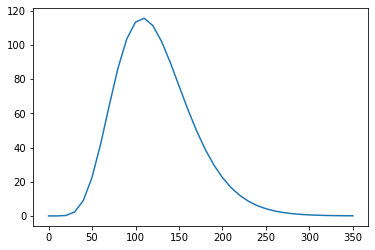

In [161]:
plt.plot(X, Y)